In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [15]:
# Task 1: Data Preparation
# Step 1: Load the Olivetti face dataset
data = fetch_olivetti_faces()
X = data.data
y = data.target

Each row of 'data' is a 1D vector of size 4096 because each face image is represented as a flattened array of pixels (64x64 = 4096).
The dataset has 40 different labels representing 40 distinct individuals.

In [16]:
# Step 2: Reduce Dimensionality with PCA
# Dimensionality of the original training data
original_dim = X.shape[1]
# Reduce dimensionality using PCA while preserving 99% of the variance
pca = PCA(n_components=0.99)
X_compressed = pca.fit_transform(X)

# Dimensionality of the compressed training data
compressed_dim = X_compressed.shape[1]


In [17]:
# Task 2: Training a ML model
# Step 3: Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_compressed, y, test_size=0.2, random_state=42)

In [18]:
# Step 4: Cluster the compressed training images using K-Means
kmeans = KMeans(n_clusters=40, random_state=42)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=40, random_state=42)

In [19]:
# Step 5: Visualize the clusters
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

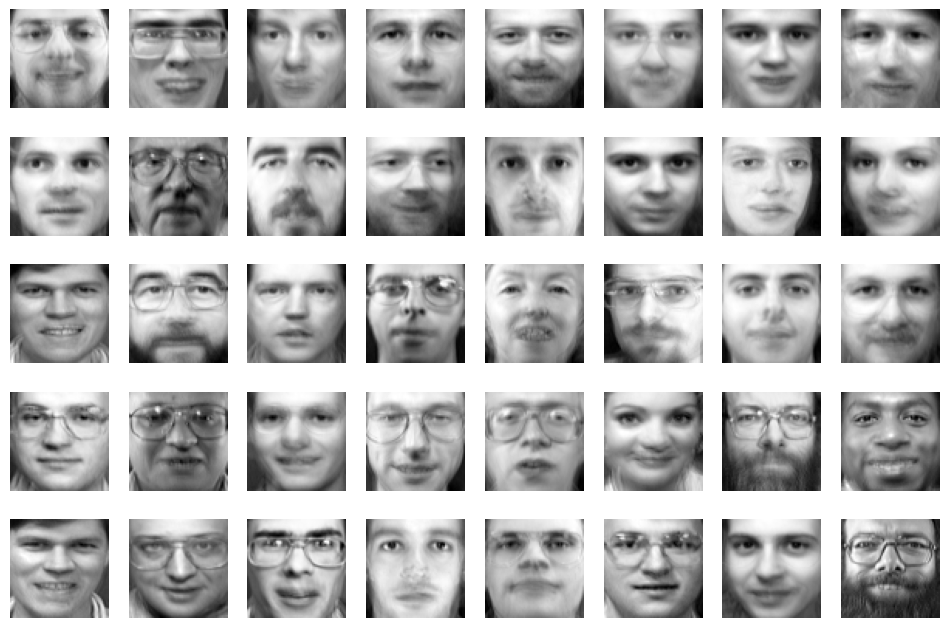

In [20]:
# Plotting the cluster centers (representative faces)
fig, axes = plt.subplots(5, 8, figsize=(12, 8))
image_shape = (64, 64)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(pca.inverse_transform(cluster_centers[i]).reshape(image_shape), cmap='gray')
    ax.axis('off')
plt.show()

In [21]:
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.14805944


The clustering result depends on how well the faces are separated into clusters. If the result is good, faces belonging to the same individual should be grouped together.


Variations observed include differences in lighting conditions, facial expressions, and poses within each cluster.


Other clustering algorithms that can be applied to this problem include DBSCAN, Agglomerative Clustering, and Gaussian Mixture Models (GMMs).